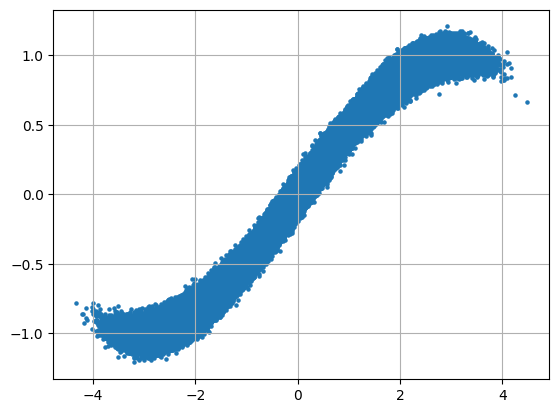

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2023_MCD3735A/Módulo 6 - Discretización de variables/'
df=pd.read_csv(ruta+'dataKmeans.csv')
plt.scatter(df.x,df.y,s=5)
plt.grid()

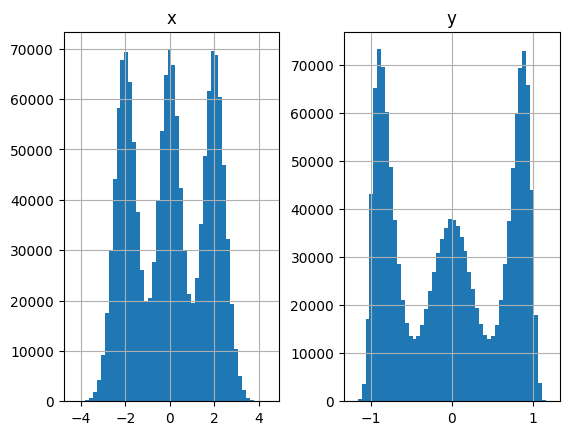

In [2]:
H=df.hist(bins=50)

In [3]:
#@title Discretizacion
#
# 1. Seleccion de centroides
k=3
# ctr=np.random.uniform(df.x.min(),df.x.max(),k)
m=df.x.min()
M=df.x.max()
ctr=[np.random.uniform(m+(M-m)/k*i,m+(M-m)/k*(i+1)) for i in range(k)]
ctr=np.array(ctr)
ctr

array([-3.26027861,  0.57911795,  3.98706104])

In [4]:
# 2. Asignación de elementos
# 
# Métrica
def distancia(ctr,obs):
  return np.abs(ctr-obs)
distancia(ctr,df.x[0])

array([1.35431181, 2.48508476, 5.89302785])

In [5]:
np.argmin(distancia(ctr,df.x[0]))

0

In [11]:
grupos=[]
for obs in df.x.values:
  g_idx=np.argmin(distancia(ctr,obs))
  grupos.append(g_idx)
df_copia=df.copy()
df['grupos']=grupos

In [18]:
# Alternativa feliz :)
#
diferencias=[]
for c_i in ctr:
  diferencias.append(distancia(df.x.values,c_i).reshape(-1,1))
diferencias=np.concatenate(diferencias,axis=1)
grupos=np.argmin(diferencias,axis=1)

In [ ]:
ctr,df.groupby('grupos')['x'].mean()

(array([-2.93658074,  1.38014912,  1.83251482]),
 grupos
 0   -1.952960
 1    0.291027
 2    2.185927
 Name: x, dtype: float64)

In [ ]:
# 3. Actualización de centroides
ctr_anterior=ctr.copy()
ctr=df.groupby('grupos')['x'].mean().values
ctr

array([-1.95296048,  0.29102686,  2.18592718])

In [ ]:
ctr_anterior-ctr

array([-0.98362026,  1.08912226, -0.35341236])

In [ ]:
# 4. Repetir hasta encontrar los centroides óptimos
eps=1e-6
#ctr_anterior=np.ones(k)*np.inf
while(np.abs(ctr-ctr_anterior).sum()>eps):
  grupos=[]
  for obs in df.x:
    g_idx=np.argmin(distancia(ctr,obs))
    grupos.append(g_idx)
  df_copy=df.copy()
  df['grupos']=grupos
  ctr_anterior=ctr.copy()
  ctr=df.groupby('grupos')['x'].mean().values
ctr

array([-2.01017736e+00,  7.44339211e-04,  2.00995408e+00])

In [19]:
# 4. Alternativa
eps=1e-6
ctr_anterior=np.ones(k)*np.inf
while(np.abs(ctr-ctr_anterior).sum()>eps):
  diferencias=[]
  for c_i in ctr:
    diferencias.append(distancia(df.x.values,c_i).reshape(-1,1))
  diferencias=np.concatenate(diferencias,axis=1)
  grupos=np.argmin(diferencias,axis=1)
  df_copy=df.copy()
  df_copy['grupos']=grupos
  ctr_anterior=ctr.copy()
  ctr=df_copy.groupby('grupos')['x'].mean().values
ctr

array([-2.01017736e+00,  7.44339211e-04,  2.00995408e+00])

In [20]:
ctr,ctr_anterior

(array([-2.01017736e+00,  7.44339211e-04,  2.00995408e+00]),
 array([-2.01017736e+00,  7.44339211e-04,  2.00995408e+00]))

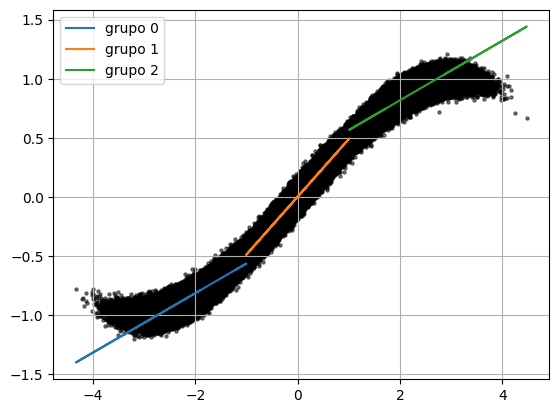

In [21]:
#@title Regresión
df['grupos']=grupos

plt.scatter(df.x,df.y,s=5,c='k',alpha=0.5)
Listlin=[]
for gr in range(k):
  x=df.groupby('grupos')['x'].get_group(gr)
  y=df.groupby('grupos')['y'].get_group(gr)
  Listlin.append(LinearRegression())
  Listlin[-1].fit(x.values.reshape(-1,1),y)

  plt.plot(x,Listlin[-1].predict(x.values.reshape(-1,1)),label='grupo '+str(gr))
plt.legend()
plt.grid()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


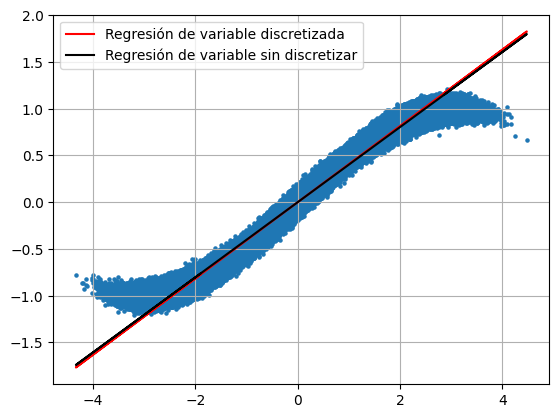

In [31]:
lin_ctr=LinearRegression()
ctr_y=df.groupby('grupos')['y'].mean()
lin_ctr.fit(ctr.reshape(-1,1),ctr_y)
plt.scatter(df.x,df.y,s=5)
plt.plot(df.x,lin_ctr.predict(df[['x']]),'r',label='Regresión de variable discretizada')

lin=LinearRegression()
lin.fit(df[['x']],df['y'])
plt.plot(df.x,lin.predict(df[['x']]),'k',label='Regresión de variable sin discretizar')
plt.legend()
plt.grid()

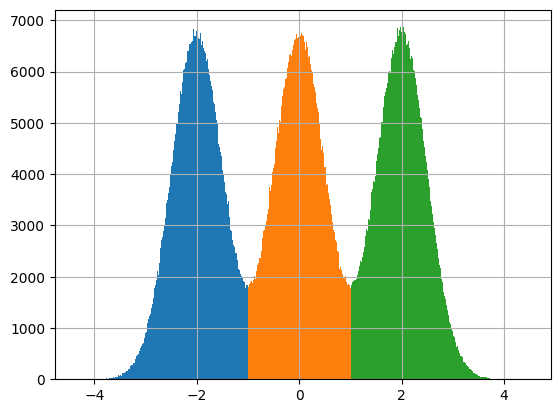

In [23]:
H=df.groupby('grupos')['x'].hist(bins='auto')

In [24]:
#@title Usando la clase de `SKLearn`
from sklearn.preprocessing import KBinsDiscretizer

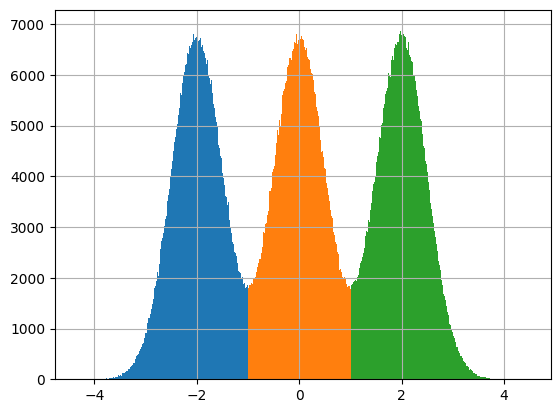

In [32]:
discre=KBinsDiscretizer(k,encode='ordinal',strategy='kmeans') # strategy='quantile' -> frecuencia constante; 'uniform' -> ancho constante
df['KBD']=discre.fit_transform(df[['x']])
H=df.groupby('KBD')['x'].hist(bins='auto')

In [33]:
discre.bin_edges_

array([array([-4.33379594, -1.0030711 ,  1.00716735,  4.47661721])],
      dtype=object)

In [34]:
df.groupby('KBD')['x'].mean()

KBD
0.0   -2.009799
1.0    0.001510
2.0    2.010344
Name: x, dtype: float64

In [35]:
ctr

array([-2.01017736e+00,  7.44339211e-04,  2.00995408e+00])